# Random Forest 

## Important Parameters

 - **n_estimators**: Controls the number of decision trees in the forest. Default: 100. 
 - **max_depth**: Controls the max number of nodes and layers of the tree. Default: Until all leaves are pure or until all leaves contain less than 2 samples.

## Relevant Information: 
 - Random Forest are **not sensitive to feature scaling.**
 - Approx Complexity $O(n_{\text{estimators}} \cdot NM \cdot \log(N))$ where $M$ number of attributes and $N$ the number of instances.  
 

## Implementation

We are going to work with the [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) Dataset



In [45]:
#Import usual libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#Import usual functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score

#Import utils
from utils.plot import confusion_matrix_custom


#Import required libraries for this notebook
from sklearn.datasets import load_iris, load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Load the dataset 
digits = load_digits()
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df["target"] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Usage

In [3]:
#Divide the data 
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["target"]), df["target"], test_size=0.333, stratify = df["target"], random_state=666)
#Create the model
clf = RandomForestClassifier(random_state = 666)
#Fit the data
clf.fit(X_train,y_train)
#Make a prediction
y_pred = clf.predict(X_test)

### Show Performance 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.98      1.00      0.99        61
           2       1.00      1.00      1.00        59
           3       0.98      0.95      0.97        61
           4       0.97      0.98      0.98        60
           5       0.95      0.98      0.97        61
           6       0.98      0.98      0.98        60
           7       0.97      1.00      0.98        60
           8       1.00      0.91      0.95        58
           9       0.95      0.97      0.96        60

    accuracy                           0.98       599
   macro avg       0.98      0.98      0.98       599
weighted avg       0.98      0.98      0.98       599



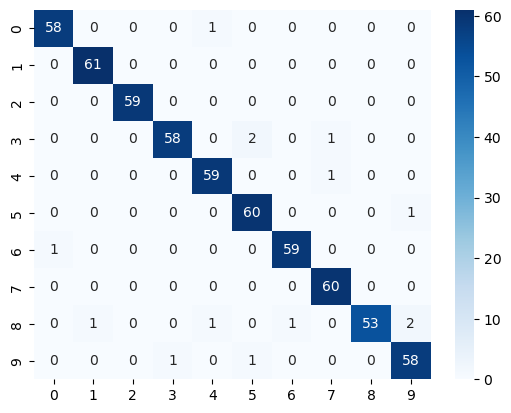

In [4]:
#Change of notation
y_real = y_test

#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred)

#Showing performance with metrics
print(classification_report(y_real , y_pred))


Better performance when compared to a Decision Tree 

### Showing the n_estimators effect

Text(0.5, 1.0, 'Random Forest Algorithm')

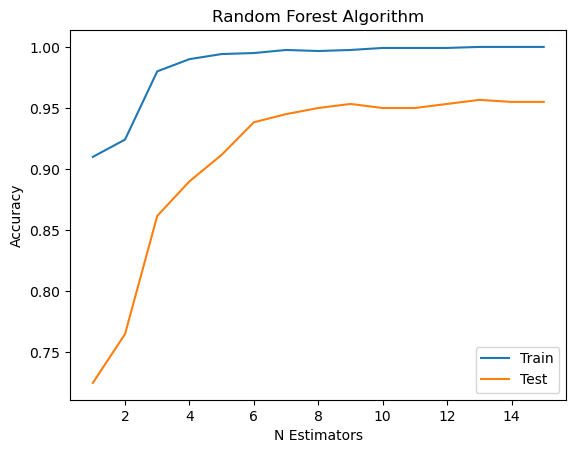

In [12]:
#Creating a list of n_estimators options
n_estimators_list = [1, 2 , 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
accuracy_train_list = []
accuracy_test_list = []

#Creating the models with fixed n_estimators
for estimators in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=estimators, random_state = 666)
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    accuracy_train_list.append(accuracy_score(y_train,y_pred_train))
    accuracy_test_list.append(accuracy_score(y_test,y_pred_test))

#Plotting
plt.plot(n_estimators_list,accuracy_train_list,label = "Train")
plt.plot(n_estimators_list,accuracy_test_list,label = "Test")
plt.legend()
plt.xlabel("N Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Algorithm")
# plt.savefig("img/n_estimators_random_forest.png", dpi = 300)



# Balanced Random Forest 

Same implementation as the Random Forest but each bootstrap sample will be further **resampled** to achieve the *sampling_strategy* (under-sampling or over-sampling) Default: Remove random values from all classes but the minority (under-sampling). 

In [16]:
#Import required libraries for this notebook
from sklearn.datasets import load_iris, load_digits
from imblearn.ensemble import BalancedRandomForestClassifier

### Usage

In [17]:
#Divide the data 
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["target"]), df["target"], test_size=0.333, stratify = df["target"], random_state=666)
#Create the model
clf = BalancedRandomForestClassifier(random_state = 666)
#Fit the data
clf.fit(X_train,y_train)
#Make a prediction
y_pred = clf.predict(X_test)

c:\Users\bruno\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\bruno\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\bruno\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


### Show Performance

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.98      1.00      0.99        61
           2       0.97      1.00      0.98        59
           3       0.97      0.95      0.96        61
           4       0.98      0.98      0.98        60
           5       0.95      0.98      0.97        61
           6       1.00      0.98      0.99        60
           7       0.95      1.00      0.98        60
           8       0.96      0.93      0.95        58
           9       0.98      0.92      0.95        60

    accuracy                           0.97       599
   macro avg       0.97      0.97      0.97       599
weighted avg       0.97      0.97      0.97       599



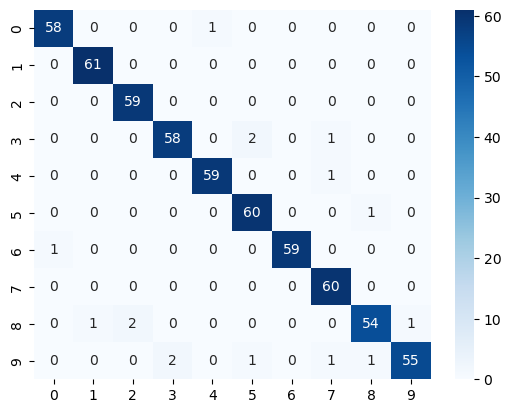

In [18]:
#Change of notation
y_real = y_test

#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred)

#Showing performance with metrics
print(classification_report(y_real , y_pred))

**Same results as the Random Forest because the dataset was balanced.**